In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("green_tripdata_2015-09.csv")

## Question 3 part1
Report mean and median trip distance grouped by hour of day

In [3]:
# **********************  Question 3 part 1 ********************
# choosing only two columns that are need (we use pickup date time)
df_help = df.loc[:, ['lpep_pickup_datetime','Trip_distance']] 
# converting the "lpep_pickup_datetime" to DateTime series
df_help.loc[:, "lpep_pickup_datetime"] = pd.to_datetime(df_help.loc[:, "lpep_pickup_datetime"])
# take Hour from Datetime Column Directly
df_help.loc[:, "hour"] = df_help.loc[:, "lpep_pickup_datetime"].dt.hour
# calculate mean trip distance grouped by hour of day
mean_dist_hour = df_help.groupby(['hour']).mean()
# calculate median trip distance grouped by hour of day
median_dist_hour = df_help.groupby(['hour']).median()
df2 = mean_dist_hour
df3 = median_dist_hour
frames = [df2, df3]
result = pd.concat(frames, axis=1)
result.columns = ['mean', 'median']
result

,mean,median
hour,,
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98


## Question 3 part 2: 

I used "RateCodeID" for finding those trips that originate or terminate at one of the NYC area airport. 
Because based on the dictionary of variables "RateCodeID" contains final rate code in effect at the end of the trip, 
and there are two values corresponding to Newark and JFK (two airports in Newyork)
so I select those records that have RateCodeID 2 (JFK) or 3 (Newark)

In [4]:
df_air = df[df['RateCodeID'].isin([2, 3])]
print ("number of total trips to/from airports in Newyork:" , len(df_air))
print ("average fair (+tip) of trips to/from airports in Newyork:", df_air["Total_amount"].mean())
print ("average fair (before tip) of trips to/from airports in Newyork:", df_air["Fare_amount"].mean())
print ("average tip amount of trips to/from airports in Newyork:", df_air["Tip_amount"].mean())

('number of total trips to/from airports in Newyork:', 5552)
('average fair (+tip) of trips to/from airports in Newyork:', 57.20842038904719)
('average fair (before tip) of trips to/from airports in Newyork:', 48.976945244956774)
('average tip amount of trips to/from airports in Newyork:', 4.353515850144067)


### impact of time of day on the trip distance to/from airport

1. I plot number of trips to/from airports per hour
2. figure shows that maximum number of trips to/from NYC airport is around 15:00

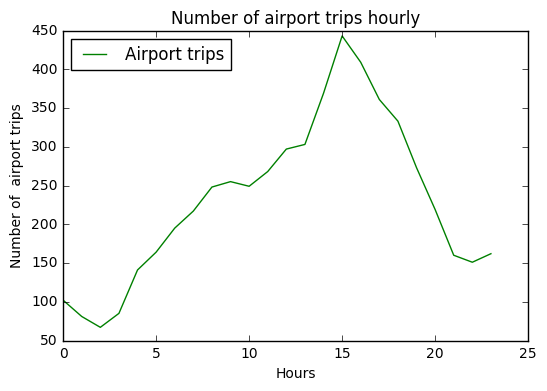

In [7]:
# plot number of trips to/from airports per hour

df_air.loc[:, "lpep_pickup_datetime"] = pd.to_datetime(df_air.loc[:, "lpep_pickup_datetime"])
# take Hour from Datetime Column Directly
df_air.loc[:, "hour"] = df_air.loc[:, "lpep_pickup_datetime"].dt.hour

y = df_air.hour.value_counts().sort_index()
x = [i for i in range(0,24)]
fig, ax = plt.subplots(1)
plt.xlabel('Hours')
plt.ylabel("Number of  airport trips")
plt.title('Number of airport trips hourly')
plt.plot(x, y,  color = "g")
plt.legend(['Airport trips'], loc='best')
plt.show()
# plt.savefig("Q3_2", format = 'pdf')

### distance distribution of trips to/from airports

As figure describes there are two peak, those airport trips that are less than 2 miles
and other airport trips that are around 18 miles

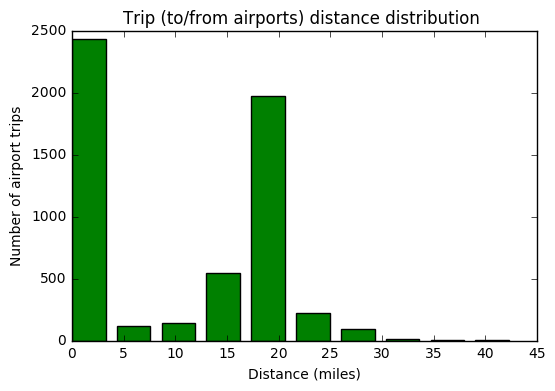

In [8]:
# plot distance of trips to/from airports (miles)
import numpy as np
x = df_air.loc[:, "Trip_distance"]
# Remove outliers (+/- 3 std)
outlier = (x-x.median()).abs()>3*x.std()
x = x[~(outlier)]
bins = np.histogram(x)[1]
h2 = np.histogram(x,bins=bins)
w = .75*(bins[1]-bins[0])
fig, ax = plt.subplots(1)
plt.bar(bins[:-1],h2[0],alpha=1,width=w,color='g')
plt.xlabel('Distance (miles)')
plt.ylabel("Number of airport trips")
plt.title('Trip (to/from airports) distance distribution ')
plt.show()
